# 陸上男子100mデータ解析来年のタイムがどのくらい伸びるのかを解析してみた

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'
warnings.filterwarnings('ignore')
df_2020 = pd.read_csv('T&F2020_men.csv')
df_2021 = pd.read_csv('T&F2021_men.csv')
df = pd.concat([df_2020, df_2021], axis=0)
df.head()

,記録,名前,都道府県,学校,学年,競技日,種目,年度
0,10.32,柳田大輝,群馬,農大二,2年,9月5日,男子100m,2020
1,10.39,河田航典,愛知,中京大中京,3年,7月23日,男子100m,2020
2,10.44,三輪颯太,埼玉,西武文理,3年,8月11日,男子100m,2020
3,10.46,高木陸,茨城,土浦湖北,3年,7月24日,男子100m,2020
4,10.46,重谷大樹,福岡,九産大付九産,3年,8月23日,男子100m,2020


In [2]:
df_100 = df[df['種目'] == '男子100m']

In [3]:
def convert_to_seconds(time_str):
    if ':' in time_str:
        minutes, seconds = time_str.split(':')[0], time_str.split(':')[1]
        return int(minutes) * 60 + float(seconds)
    else:
        return float(time_str)
df_100['秒数'] = df_100['記録'].apply(convert_to_seconds)

## 2年分のデータを用いて10~14秒の学年タイムごとの割合を算出
### 学年4,5,8,9が入っているのでそれを除外

In [4]:
df_100.loc[(df_100['秒数'] >= 10) & (df_100['秒数'] < 11), 'タイム別'] = '10秒台' 
df_100.loc[(df_100['秒数'] >= 11) & (df_100['秒数'] < 12), 'タイム別'] = '11秒台'
df_100.loc[(df_100['秒数'] >= 12) & (df_100['秒数'] < 13), 'タイム別'] = '12秒台' 
df_100.loc[(df_100['秒数'] >= 13) & (df_100['秒数'] < 14), 'タイム別'] = '13秒台' 
df_100.loc[(df_100['秒数'] >= 14) & (df_100['秒数'] < 15), 'タイム別'] = '14秒台' 
df_100 = df_100[df_100['学年'] != '4年']
df_100 = df_100[df_100['学年'] != '5年']
df_100 = df_100[df_100['学年'] != '8年']
df_100 = df_100[df_100['学年'] != '9年']
grade_time = df_100[['学年','タイム別','種目']].groupby(['タイム別', '学年']).count()
total = grade_time['種目'].sum()
grade_time['割合'] = grade_time['種目'] / total 
grade_time

種目        割合
タイム別 学年                
10秒台 1年    41  0.003024
     2年   191  0.014089
     3年   401  0.029579
11秒台 1年  1166  0.086007
     2年  2439  0.179907
     3年  2390  0.176293
12秒台 1年  2178  0.160655
     2年  2111  0.155713
     3年  1208  0.089105
13秒台 1年   782  0.057682
     2年   318  0.023457
     3年   156  0.011507
14秒台 1年   114  0.008409
     2年    38  0.002803
     3年    24  0.001770

## 2年分のデータを用いてタイムごとの人数と割合を算出

In [5]:
grade_time = df_100[['タイム別','種目']].groupby(['タイム別']).count()
total = grade_time['種目'].sum()
grade_time['割合'] = grade_time['種目'] / total 
grade_time

,種目,割合
タイム別,,
10秒台,633,0.046692
11秒台,5995,0.442207
12秒台,5497,0.405473
13秒台,1256,0.092646
14秒台,176,0.012982


#### 11秒,12秒の人が多い。　10秒の人は少ないことがわかる

## 名前が重複している人を取り出し、名前と年度ごとに並べ替えている

In [6]:
men_duplicated100 = df_100[df_100.duplicated(subset='名前', keep=False)].sort_values(['名前','年度'])

## 名前が重複しているデータを取り出し、タイムごとの差分を表示
### タイムが遅くなった人は赤色、
### 0.01秒〜0.29秒の向上は緑,0.3〜0.5秒向上は青色
### 0.51秒以上は黄色

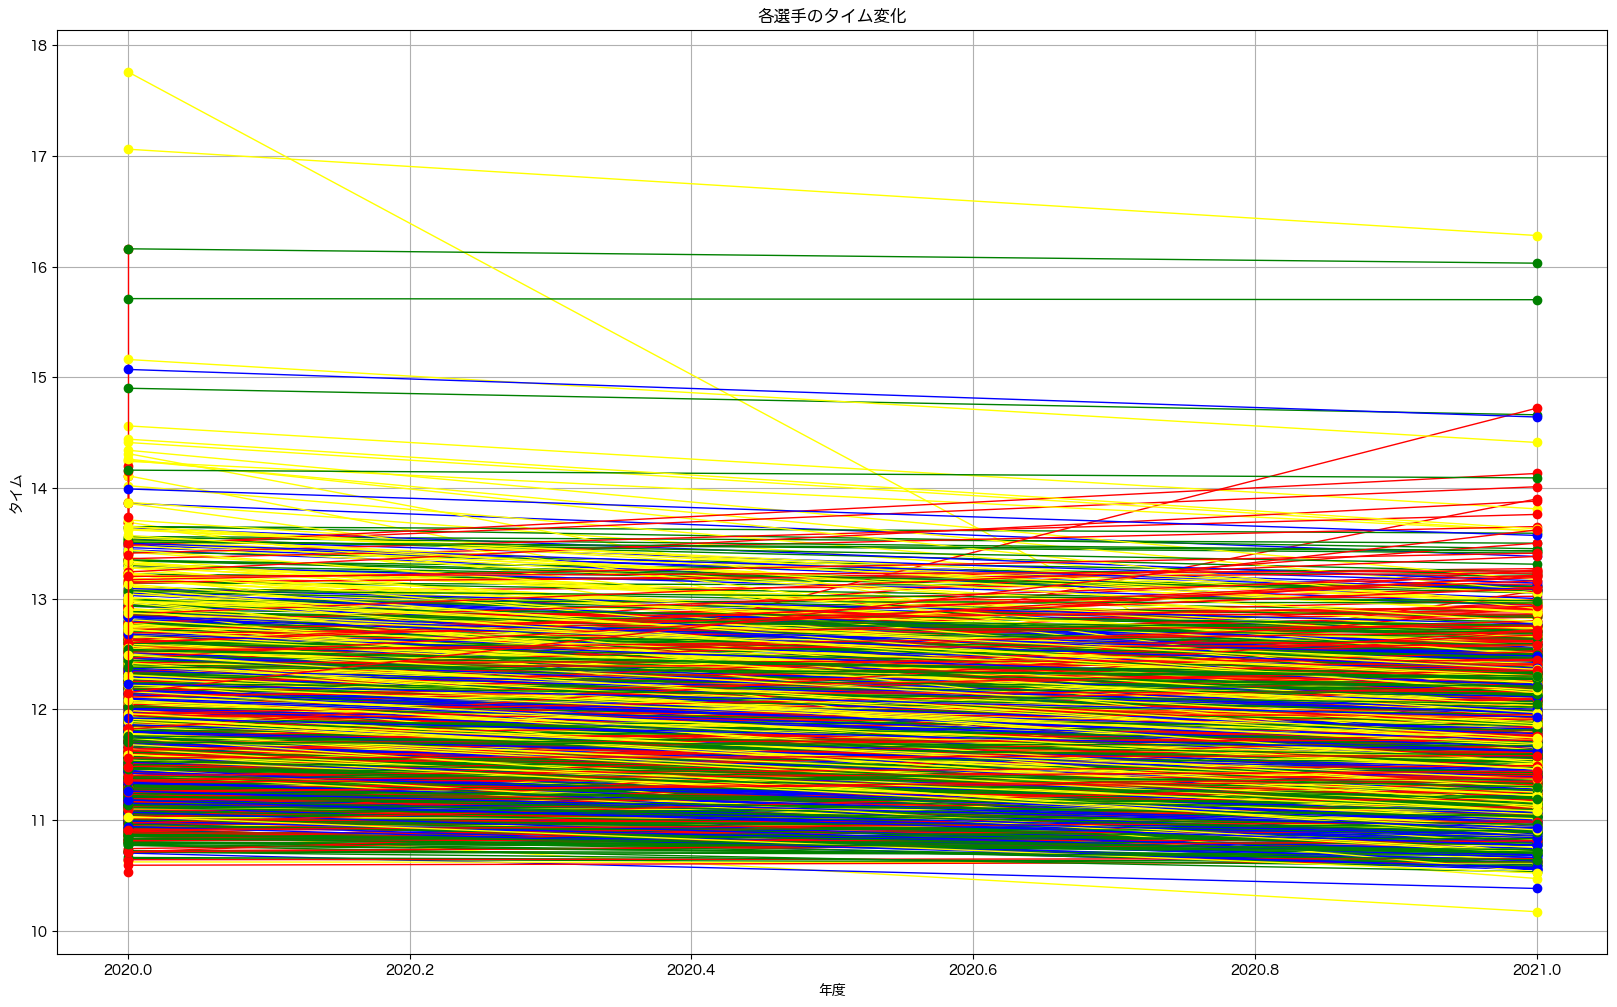

In [7]:
plt.figure(figsize=(20, 12))

for name in men_duplicated100['名前'].unique():
    df_name = men_duplicated100[men_duplicated100['名前'] == name]
    
    diff = df_name['秒数'].diff().dropna()
    
    for i in range(len(diff)):
        if diff.iloc[i] >= 0:
            color = 'red'
        elif diff.iloc[i] <= -0.01 and diff.iloc[i] > -0.3:
            color = 'green'
        elif diff.iloc[i] <= -0.3 and diff.iloc[i] >= -0.5:
            color = 'blue'
        else:
            color = 'yellow'
            
        plt.plot(df_name['年度'].iloc[i:i+2], df_name['秒数'].iloc[i:i+2],
                 marker='o', label=name, color=color, linewidth=1)
plt.xlabel('年度')
plt.ylabel('タイム')
plt.title('各選手のタイム変化')
plt.grid(True)
plt.show()

####　全体的に分かりづらいため、色ごとに表示する

## タイムが遅くなった人だけの表示

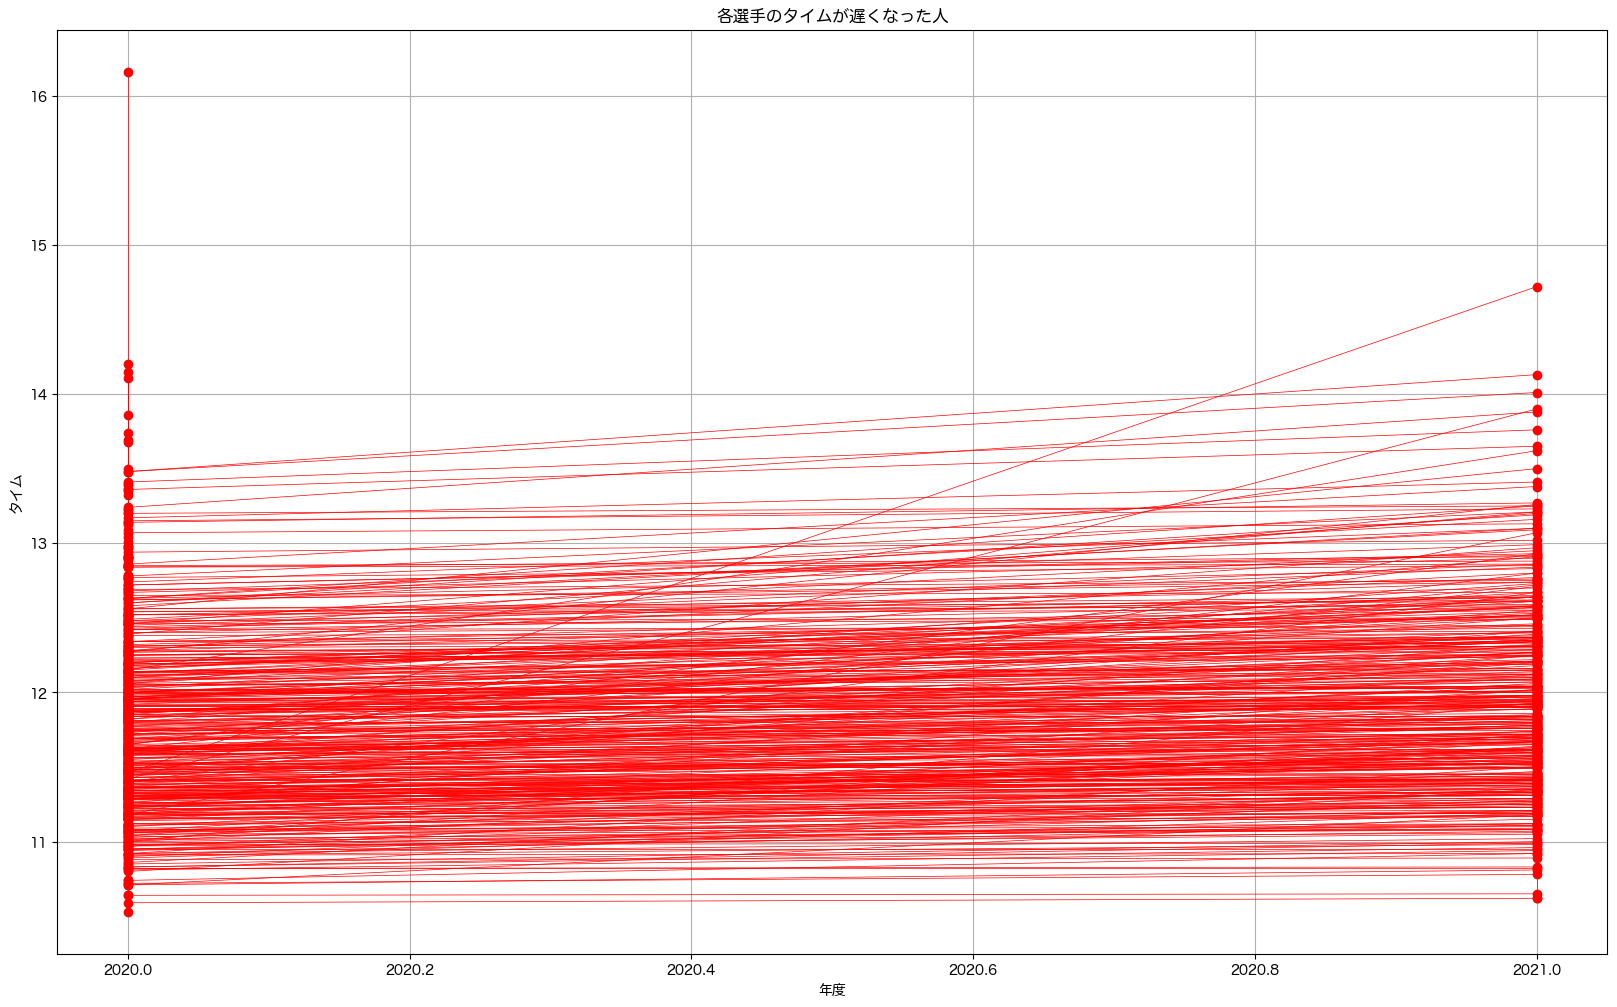

In [8]:
plt.figure(figsize=(20, 12))
for name in men_duplicated100['名前'].unique():
    df_name = men_duplicated100[men_duplicated100['名前'] == name]
    
    diff = df_name['秒数'].diff().dropna()
    
    for i in range(len(diff)):
        if diff.iloc[i] >= 0:
            color = 'red'
        else:
            continue
            
        plt.plot(df_name['年度'].iloc[i:i+2], df_name['秒数'].iloc[i:i+2],
                 marker='o', label=name, color=color, linewidth=0.5)
plt.xlabel('年度')
plt.ylabel('タイム')
plt.title('各選手のタイムが遅くなった人')
plt.grid(True)
plt.show()

#### 一番右上の点は、大きな怪我をしていることがわかる
#### 下の線の部分を見るとほぼ直線になっていることから伸び悩みが推測される

## 0.01秒〜0.29秒の向上を表示する

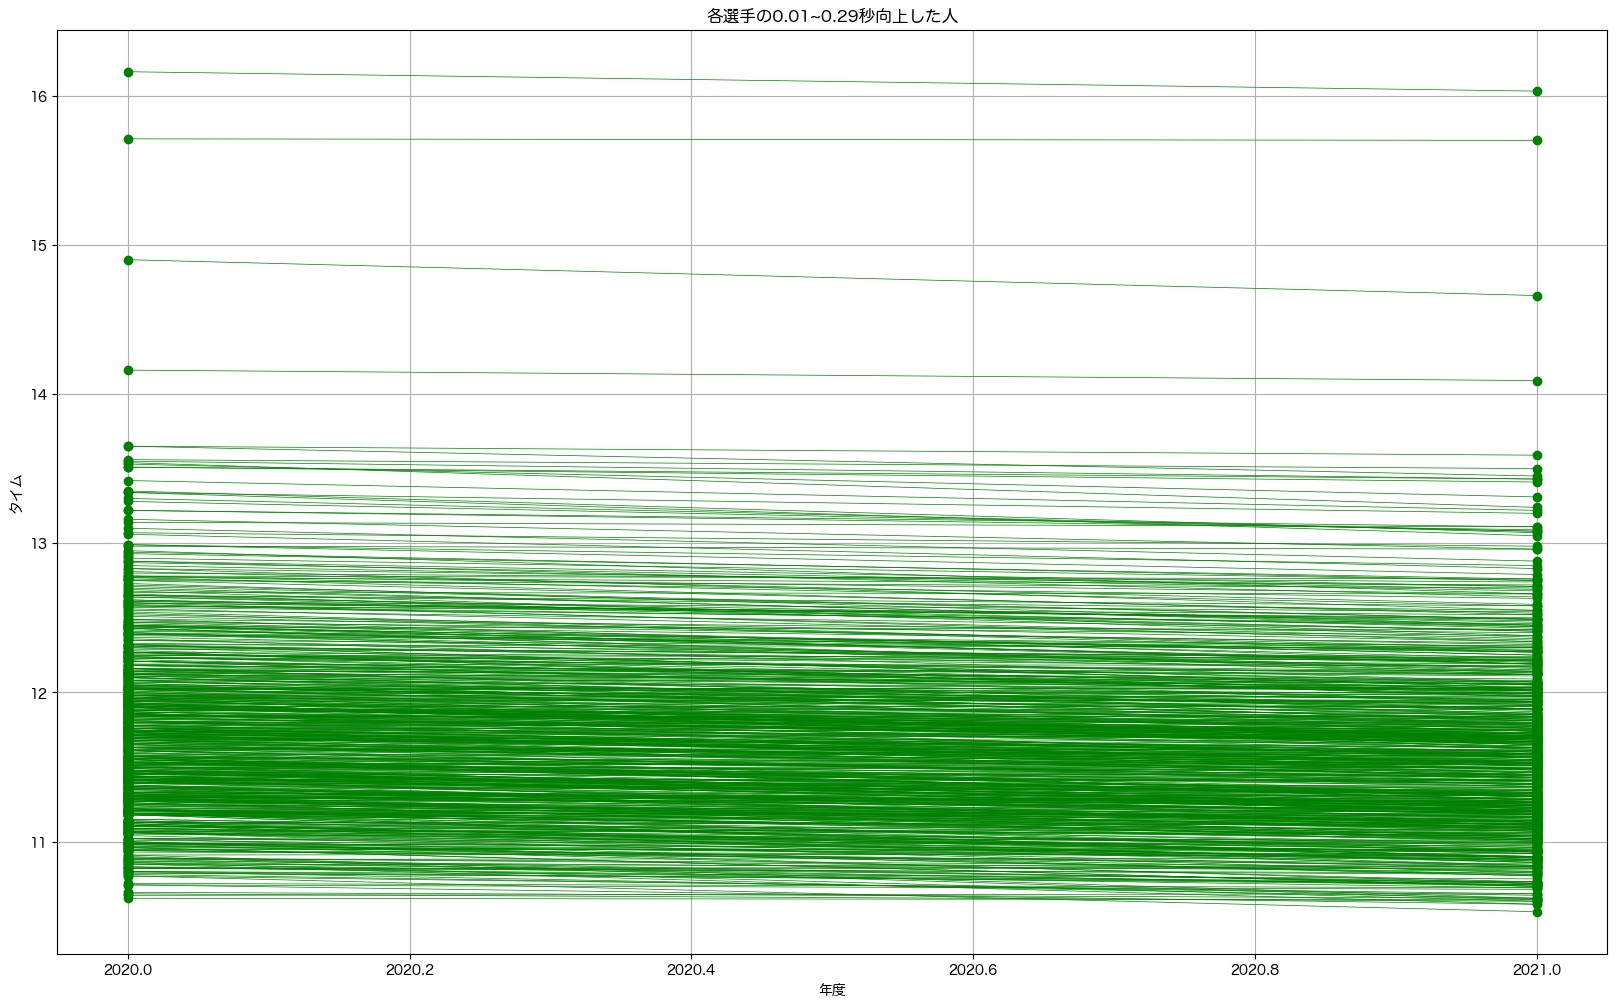

In [9]:
plt.figure(figsize=(20, 12))
for name in men_duplicated100['名前'].unique():
    df_name = men_duplicated100[men_duplicated100['名前'] == name]
    diff = df_name['秒数'].diff().dropna()
    
    for i in range(len(diff)):
        if diff.iloc[i] <= 0.01 and diff.iloc[i] > -0.3:
            color = 'green'
        else:
            continue
        
        plt.plot(df_name['年度'].iloc[i:i+2], df_name['秒数'].iloc[i:i+2],
                 marker='o', label=name, color=color, linewidth=0.5)
        
plt.xlabel('年度')
plt.ylabel('タイム')
plt.title('各選手の0.01~0.29秒向上した人')
plt.grid(True)
plt.show()

#### どこのタイムを見てもたくさんの人がいることがわかる

## 0.3〜0.5秒向上を表示する

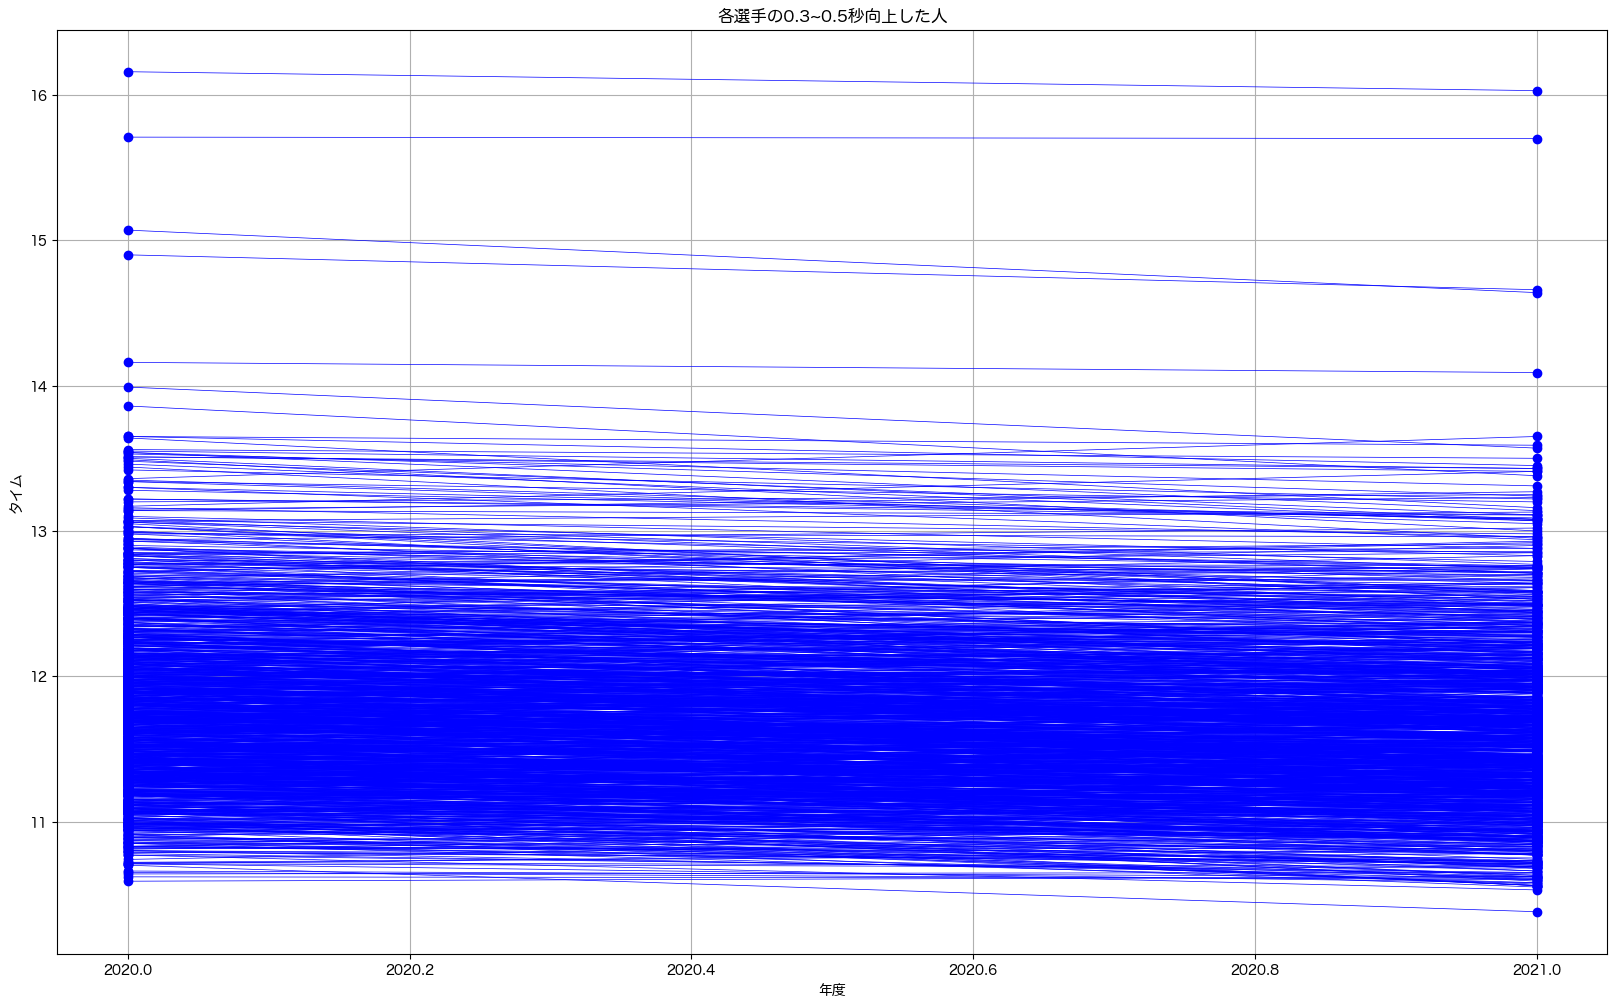

In [10]:
plt.figure(figsize=(20, 12))

for name in men_duplicated100['名前'].unique():
    df_name = men_duplicated100[men_duplicated100['名前'] == name]
    
    diff = df_name['秒数'].diff().dropna()
    
    for i in range(len(diff)):
        if diff.iloc[i] <= 0.3 and diff.iloc[i] >= -0.5:
            color = 'blue'
        else:
            continue
        
        plt.plot(df_name['年度'].iloc[i:i+2], df_name['秒数'].iloc[i:i+2],
                 marker='o', label=name, color=color, linewidth=0.5)
        
plt.xlabel('年度')
plt.ylabel('タイム')
plt.title('各選手の0.3~0.5秒向上した人')
plt.grid(True)
plt.show()

#### どこのタイムを見てもたくさんの人がいることがわかる

## 0.51秒以上向上を表示する

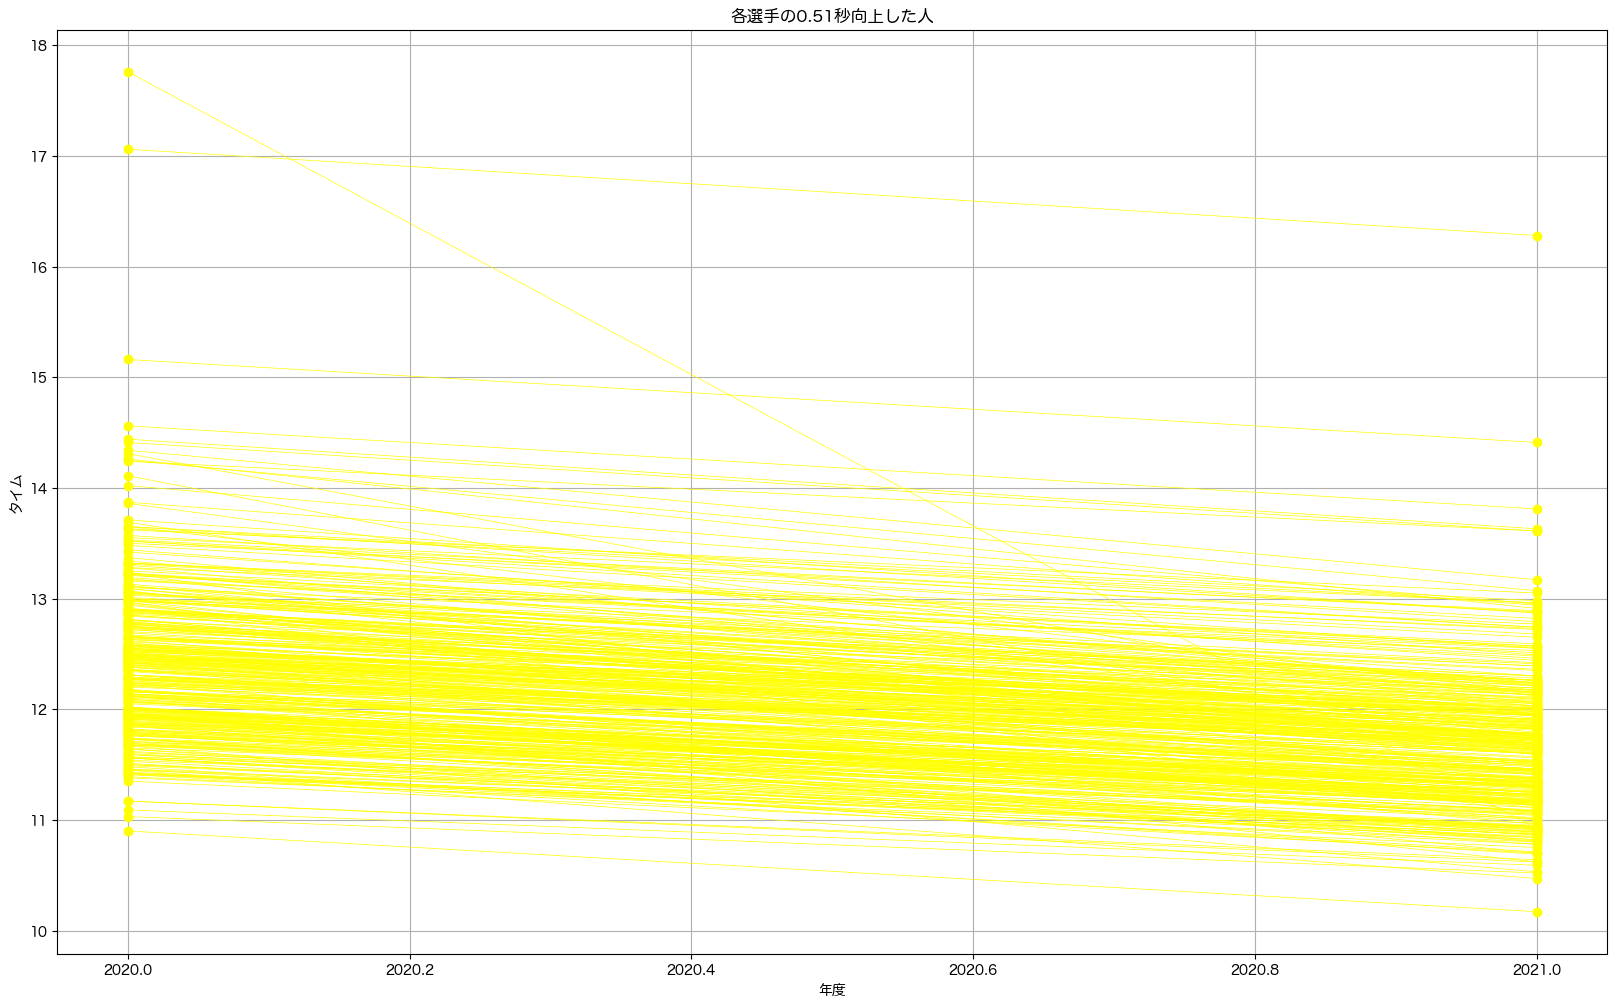

In [11]:
plt.figure(figsize=(20, 12))

for name in men_duplicated100['名前'].unique():
    df_name = men_duplicated100[men_duplicated100['名前'] == name]
    
    diff = df_name['秒数'].diff().dropna()
    
    for i in range(len(diff)):
        if diff.iloc[i] <= -0.5:
            color = 'yellow'
        else:
            continue
        
        plt.plot(df_name['年度'].iloc[i:i+2], df_name['秒数'].iloc[i:i+2],
                 marker='o', label=name, color=color, linewidth=0.5)

plt.xlabel('年度')
plt.ylabel('タイム')
plt.title('各選手の0.51秒向上した人')
plt.grid(True)

#### 11秒前後のタイムは4つしか点がないことから全然いないことがわかる。

## 1秒以上のタイム向上を表示する

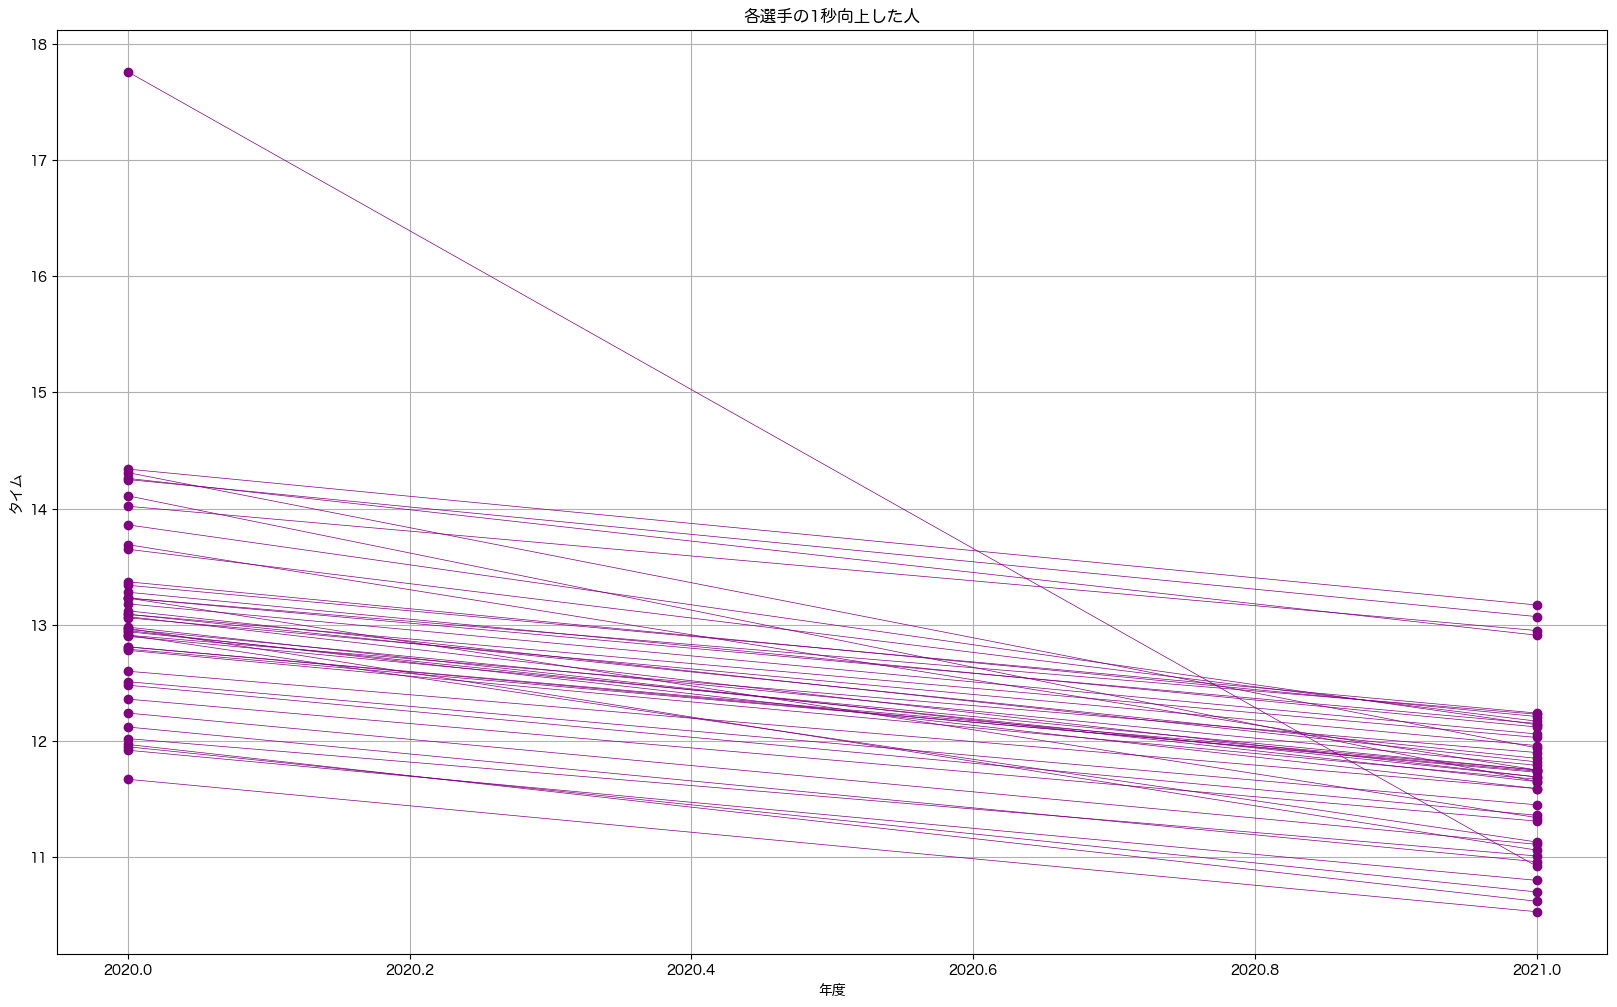

In [12]:
plt.figure(figsize=(20, 12))

for name in men_duplicated100['名前'].unique():
    df_name = men_duplicated100[men_duplicated100['名前'] == name]
    
    diff = df_name['秒数'].diff().dropna()
    
    for i in range(len(diff)):
        if diff.iloc[i] <= -1:
            color = 'purple'
        else:
            continue
        
        plt.plot(df_name['年度'].iloc[i:i+2], df_name['秒数'].iloc[i:i+2],
                 marker='o', label=name, color=color, linewidth=0.5)

plt.xlabel('年度')
plt.ylabel('タイム')
plt.title('各選手の1秒向上した人')
plt.grid(True)
plt.show()

#### 怪我から復帰している場合と努力で伸びた場合があり、どちらか判定するのが難しい
#### どこのタイムを見ても1秒以上のタイム向上はとても少ないことがわかる

## タイム変化の人数と割合算出

In [13]:
time_list = []
for name in men_duplicated100['名前'].unique():
    df_name = men_duplicated100[men_duplicated100['名前'] == name]
    
    diff = df_name['秒数'].diff().dropna()
        
    diff = round(diff, 2)
    time_list.extend(diff)
df_diff = pd.DataFrame(time_list, columns=['タイム向上'])
df_diff.loc[(df_diff['タイム向上'] >= 0), 'タイム変化'] = '遅くなった人' 
df_diff.loc[(df_diff['タイム向上'] <= -0.01) & (df_diff['タイム向上'] > -0.3), 'タイム変化'] = '0.01~0.29秒速くなった人'
df_diff.loc[(df_diff['タイム向上'] <= -0.3) & (df_diff['タイム向上'] >= -0.5), 'タイム変化'] = '0.3~0.5秒速くなった人' 
df_diff.loc[(df_diff['タイム向上'] < -0.5), 'タイム変化'] = '0.51秒以上速くなった人' 
df_diff['count'] = 1
df_diff = df_diff[['タイム変化', 'count']].groupby('タイム変化').sum().sort_values('count', ascending=False)
total = df_diff['count'].sum()
df_diff['割合'] = df_diff['count'] / total
df_diff

,count,割合
タイム変化,,
0.01~0.29秒速くなった人,643,0.334026
遅くなった人,536,0.278442
0.51秒以上速くなった人,383,0.198961
0.3~0.5秒速くなった人,363,0.188571


## タイムごとのタイム変化の人数と割合算出

In [14]:
time_list = []
for name in men_duplicated100['名前'].unique():
    df_name = men_duplicated100[men_duplicated100['名前'] == name]
    
    diff = df_name['秒数'].diff().dropna()
    time_by = df_name['タイム別'].unique()[0]
        
    diff = round(diff, 2)
    time_list.extend(zip(diff, [time_by] * len(diff)))

df_diff = pd.DataFrame(time_list, columns=['タイム向上', 'タイム別'])
df_diff.loc[(df_diff['タイム向上'] >= 0), 'タイム変化'] = '遅くなった人' 
df_diff.loc[(df_diff['タイム向上'] <= -0.01) & (df_diff['タイム向上'] > -0.3), 'タイム変化'] = '0.01~0.29秒速くなった人'
df_diff.loc[(df_diff['タイム向上'] <= -0.3) & (df_diff['タイム向上'] >= -0.5), 'タイム変化'] = '0.3~0.5秒速くなった人' 
df_diff.loc[(df_diff['タイム向上'] < -0.5), 'タイム変化'] = '0.51秒以上速くなった人' 
df_diff['count'] = 1
df_diff = df_diff[['タイム別', 'タイム変化', 'count']].groupby(['タイム別', 'タイム変化']).sum().sort_values('count', ascending=False)
total = df_diff['count'].sum()
df_diff['割合'] = df_diff['count'] / total
df_diff.reset_index().sort_values(['タイム別', 'タイム変化'])

,タイム別,タイム変化,count,割合
9,10秒台,0.01~0.29秒速くなった人,49,0.025521
15,10秒台,0.3~0.5秒速くなった人,8,0.004167
16,10秒台,0.51秒以上速くなった人,3,0.001563
10,10秒台,遅くなった人,40,0.020833
0,11秒台,0.01~0.29秒速くなった人,398,0.207292
3,11秒台,0.3~0.5秒速くなった人,197,0.102604
7,11秒台,0.51秒以上速くなった人,115,0.059896
1,11秒台,遅くなった人,331,0.172396
4,12秒台,0.01~0.29秒速くなった人,174,0.090625
6,12秒台,0.3~0.5秒速くなった人,138,0.071875


## 10~12秒ごとの割合算出

In [15]:
df_diff = df_diff.reset_index().drop('割合', axis=1)
df_diff10 = df_diff[df_diff['タイム別'] == '10秒台']
df_diff10_total = df_diff10['count'].sum()
df_diff10['タイム別割合'] = df_diff10['count'] / df_diff10_total
df_diff10['タイム変化'] = df_diff10['タイム変化'].sort_values()
df_diff10

,タイム別,タイム変化,count,タイム別割合
9,10秒台,0.01~0.29秒速くなった人,49,0.49
10,10秒台,遅くなった人,40,0.40
15,10秒台,0.3~0.5秒速くなった人,8,0.08
16,10秒台,0.51秒以上速くなった人,3,0.03


In [16]:
df_diff11 = df_diff[df_diff['タイム別'] == '11秒台']
df_diff11_total = df_diff11['count'].sum()
df_diff11['タイム別割合'] = df_diff11['count'] / df_diff11_total
df_diff11['タイム変化'] = df_diff11['タイム変化'].sort_values()
df_diff11

,タイム別,タイム変化,count,タイム別割合
0,11秒台,0.01~0.29秒速くなった人,398,0.382325
1,11秒台,遅くなった人,331,0.317963
3,11秒台,0.3~0.5秒速くなった人,197,0.189241
7,11秒台,0.51秒以上速くなった人,115,0.110471


In [17]:
df_diff12 = df_diff[df_diff['タイム別'] == '12秒台']
df_diff12_total = df_diff12['count'].sum()
df_diff12['タイム別割合'] = df_diff12['count'] / df_diff12_total
df_diff12['タイム変化'] = df_diff12['タイム変化'].sort_values()
df_diff12

,タイム別,タイム変化,count,タイム別割合
2,12秒台,0.51秒以上速くなった人,203,0.302985
4,12秒台,0.01~0.29秒速くなった人,174,0.259701
5,12秒台,遅くなった人,155,0.231343
6,12秒台,0.3~0.5秒速くなった人,138,0.205970
